# Bitcoin Data Exploratory Data Analysis

## Import Necessary Libraries

In [1]:
## Import necessary libraries
from urllib.parse import quote

## Import necessary API
import sys
sys.path.append('../../../../')
from api.v2.util.data_load import data_load
from api.v2.util.get_tag_name import show_column
from api.v2.eda.Data_Info import Data_Info
from api.v2.eda.Statistical_test import adf_test, kpss_test, pp_test, ljung_box_test, arch_test, vif_test
from api.v2.eda.Visualize_EDA import Visualize_EDA

## Set Bitcoin Data Base Parameter

In [2]:
# Set Bitcoin Data Base Parameter

# Set MachBase Neo URL address
URL = 'http://127.0.0.1:5654'
# Set Tag Table Name
table = 'Bitcoin'
# Set TimeFormat - > 'default' or '2006-01-02 15:04:05.000000'(Divided down to the nanosecond)
timeformat = '2006-01-02 15:04:05.000000'
# Set resample Option -> D(day), H(hour), T(minute), S(second)
resample_freq = '1T'

## Check Bitcoin Data Info

In [3]:
# Print Bitcoin DataInfo
Data_Info(URL, table, timeformat, resample_freq)

Tag List: ['BTC-acc_trade_price', 'BTC-acc_trade_price_24h', 'BTC-acc_trade_volume', 'BTC-acc_trade_volume_24h', 'BTC-change_price', 'BTC-change_rate', 'BTC-high_price', 'BTC-highest_52_week_price', 'BTC-low_price', 'BTC-lowest_52_week_price', 'BTC-opening_price', 'BTC-prev_closing_price', 'BTC-signed_change_price', 'BTC-signed_change_rate', 'BTC-trace_volumn', 'BTC-trade_price', 'BTC-trade_volume', 'KRW-BTC']
--------------------------------------------
Number of data: 41137
--------------------------------------------
Start Time: 2024-11-24 20:40:00
End Time: 2024-12-23 10:16:00
--------------------------------------------
Missing Values: 295183
--------------------------------------------
Smallest time interval: 60.00 seconds
Largest time interval: 60.00 seconds
--------------------------------------------
Maximum sampling rate (per second): 0.02 Hz
--------------------------------------------


## Set Bitcoin Data Extra Parmeter
* Set based on the information confirmed in the previous step

In [ ]:
# Set the desired tag names ex) ['KRW-BTC']
tags = show_column(URL, table)
# Wrap each item in the list with single quotes and separate with commas
tags_ = ",".join(f"'{tag}'" for tag in tags)
# Set Tag Name
name = quote(tags_, safe=":/")
# Set Start time
start_time = '2024-11-24 20:40:00'
# Set End time 
end_time = '2024-12-23 10:16:00'
# Set TimeFormat - > 'default' or quote('2006-01-02 15:04:05.000000')(Divided down to the nanosecond)
timeformat = quote('2006-01-02 15:04:05.000000')

In [ ]:
# Bitcoin Data Load
df = data_load(URL, table, name, start_time, end_time, timeformat, resample_freq)

# Drop NaN values
df = df.drop(['BTC-trace_volumn'], axis=1).dropna().reset_index(drop=True)

In [6]:
df

NAME,BTC-acc_trade_price,BTC-acc_trade_price_24h,BTC-acc_trade_volume,BTC-acc_trade_volume_24h,BTC-change_price,BTC-change_rate,BTC-high_price,BTC-highest_52_week_price,BTC-low_price,BTC-lowest_52_week_price,BTC-opening_price,BTC-prev_closing_price,BTC-signed_change_price,BTC-signed_change_rate,BTC-trade_price,BTC-trade_volume,KRW-BTC
0,4.325748e+11,4.749416e+11,3068.868075,3382.320600,9.280000e+06,0.068800,146000000.0,146000000.0,133501000.0,53141000.0,134820000.0,134820000.0,9.280000e+06,0.068800,1.441000e+08,0.000064,1.440898e+08
1,4.327241e+11,4.747277e+11,3069.904204,3380.679196,9.340500e+06,0.069275,146000000.0,146000000.0,133501000.0,53141000.0,134820000.0,134820000.0,9.340500e+06,0.069275,1.441657e+08,0.011872,1.441298e+08
2,4.328261e+11,4.744883e+11,3070.611507,3378.869963,9.377833e+06,0.069557,146000000.0,146000000.0,133501000.0,53141000.0,134820000.0,134820000.0,9.377833e+06,0.069557,1.441994e+08,0.018591,1.441994e+08
3,4.330639e+11,4.742929e+11,3072.259875,3377.325153,9.415250e+06,0.069823,146000000.0,146000000.0,133501000.0,53141000.0,134820000.0,134820000.0,9.415250e+06,0.069823,1.442358e+08,0.027376,1.442358e+08
4,4.333441e+11,4.744610e+11,3074.203313,3378.441927,9.329400e+06,0.069195,146000000.0,146000000.0,133501000.0,53141000.0,134820000.0,134820000.0,9.329400e+06,0.069195,1.441490e+08,0.017902,1.441490e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24726,8.271568e+09,1.008823e+11,57.096337,688.553304,1.132333e+05,0.000782,145346000.0,157000000.0,144499000.0,53141000.0,144950000.0,144950000.0,-1.132333e+05,-0.000782,1.448393e+08,0.003534,1.448393e+08
24727,8.296653e+09,1.007802e+11,57.269479,687.861725,8.185000e+04,0.000567,145346000.0,157000000.0,144499000.0,53141000.0,144950000.0,144950000.0,-8.185000e+04,-0.000567,1.448682e+08,0.005168,1.448682e+08
24728,8.332245e+09,1.007701e+11,57.515119,687.797551,5.366667e+04,0.000368,145346000.0,157000000.0,144499000.0,53141000.0,144950000.0,144950000.0,-5.366667e+04,-0.000368,1.448965e+08,0.001527,1.448965e+08
24729,8.348756e+09,1.007276e+11,57.629095,687.511315,1.274667e+05,0.000892,145346000.0,157000000.0,144499000.0,53141000.0,144950000.0,144950000.0,-1.274667e+05,-0.000892,1.448231e+08,0.000525,1.448231e+08


## Check Visualize_EDA

Start Visualize All Method
Removed NaN Columns: {'BTC-lowest_52_week_price'}


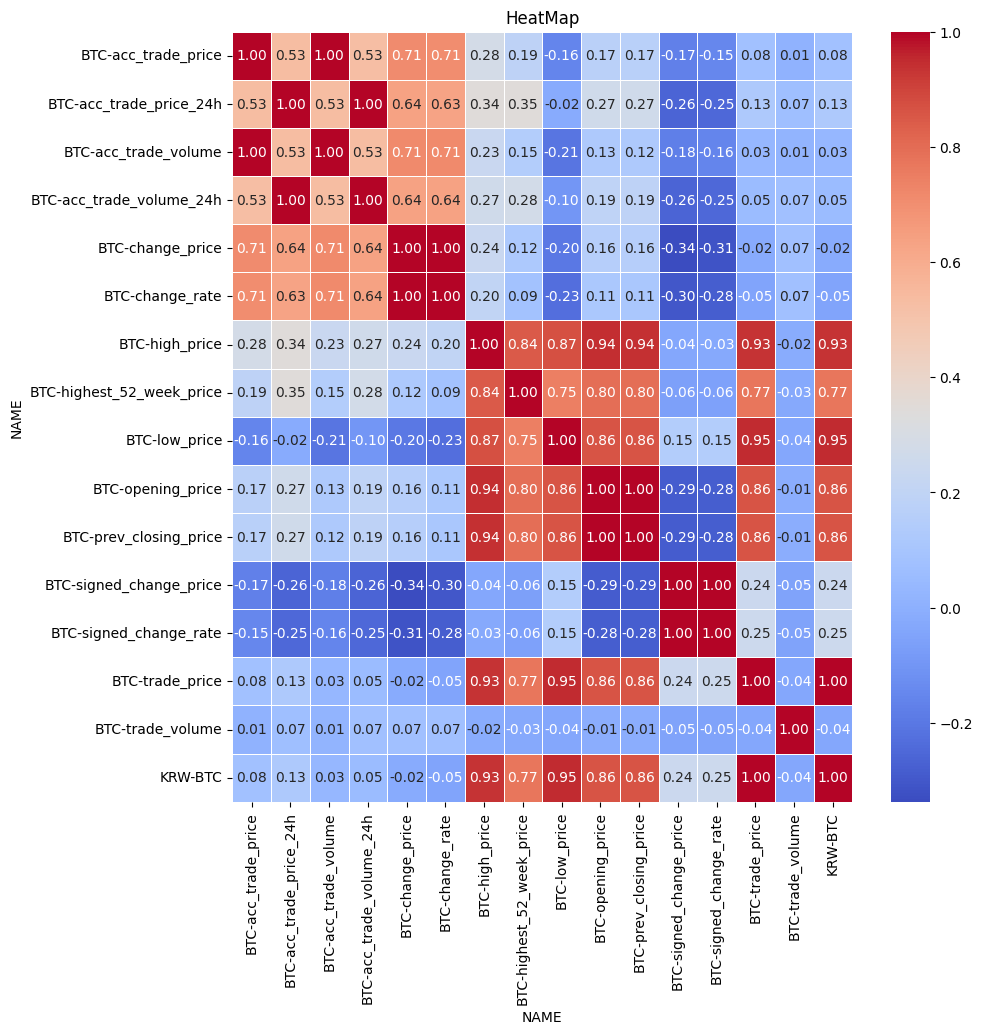

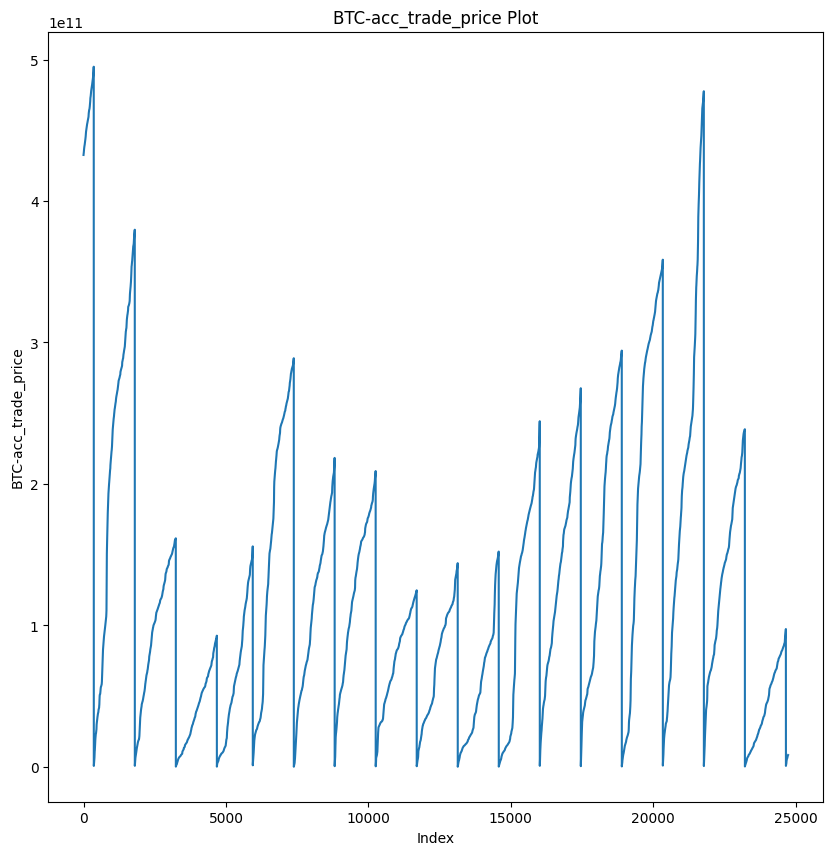

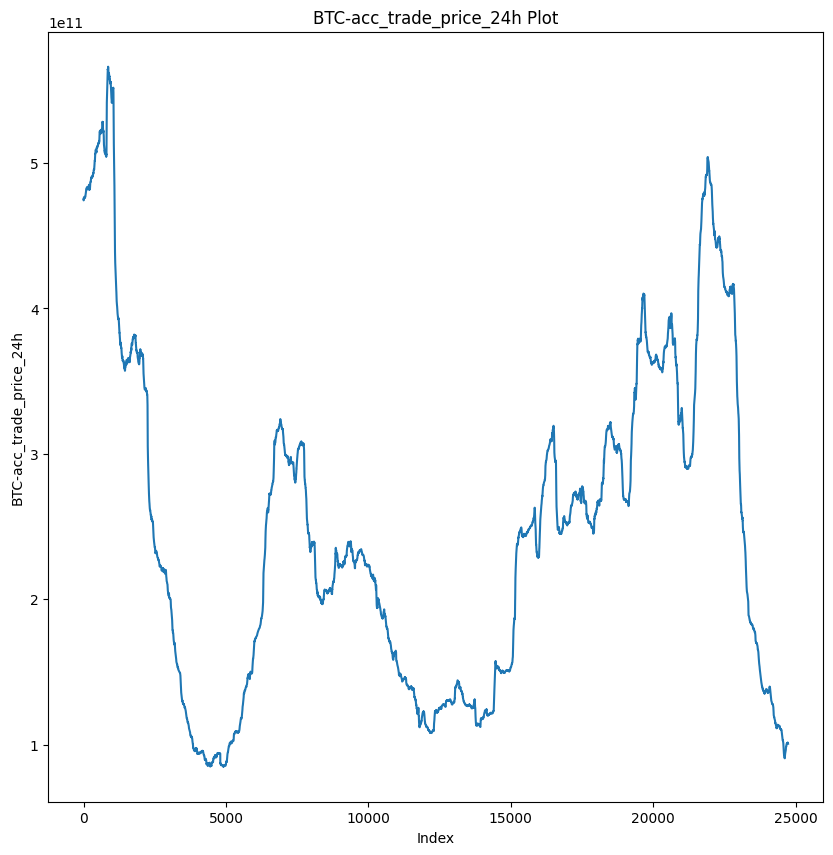

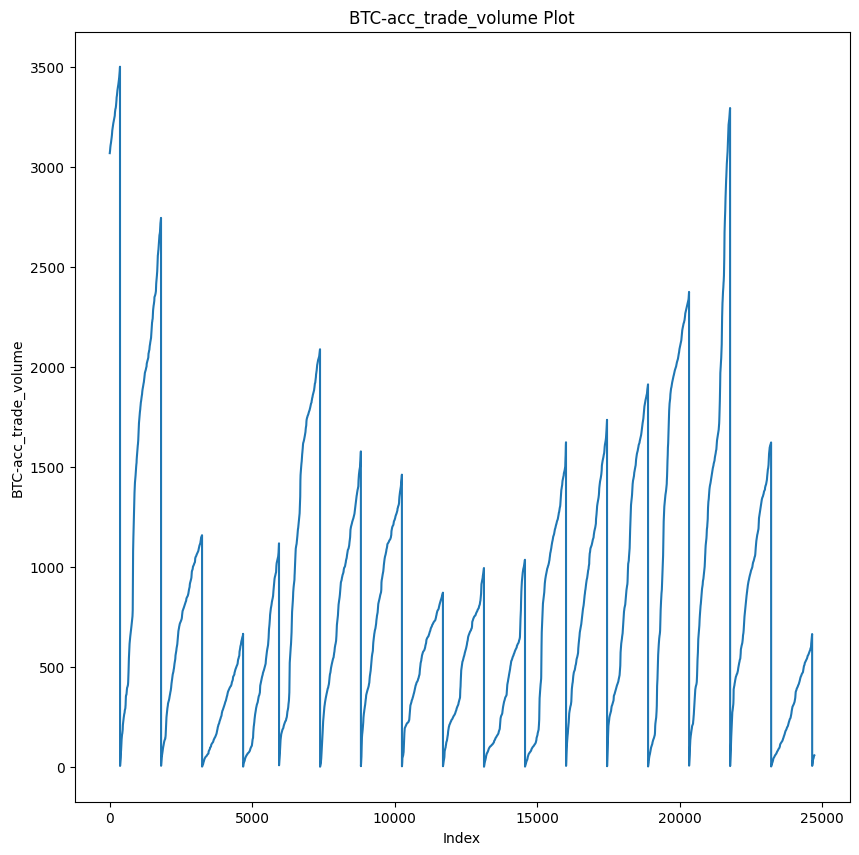

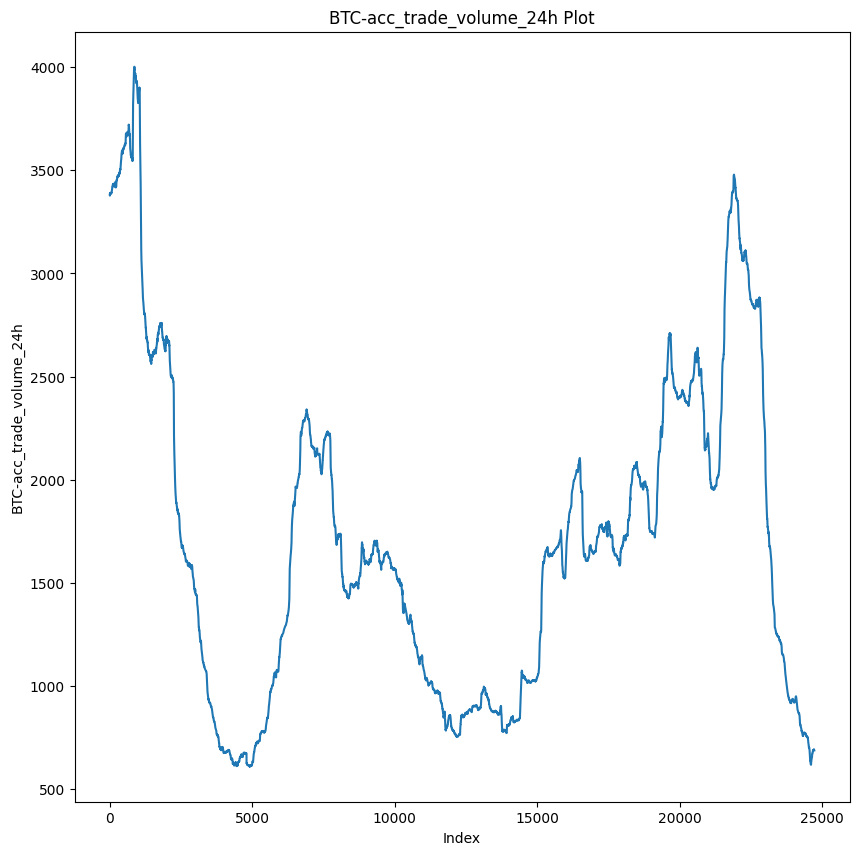

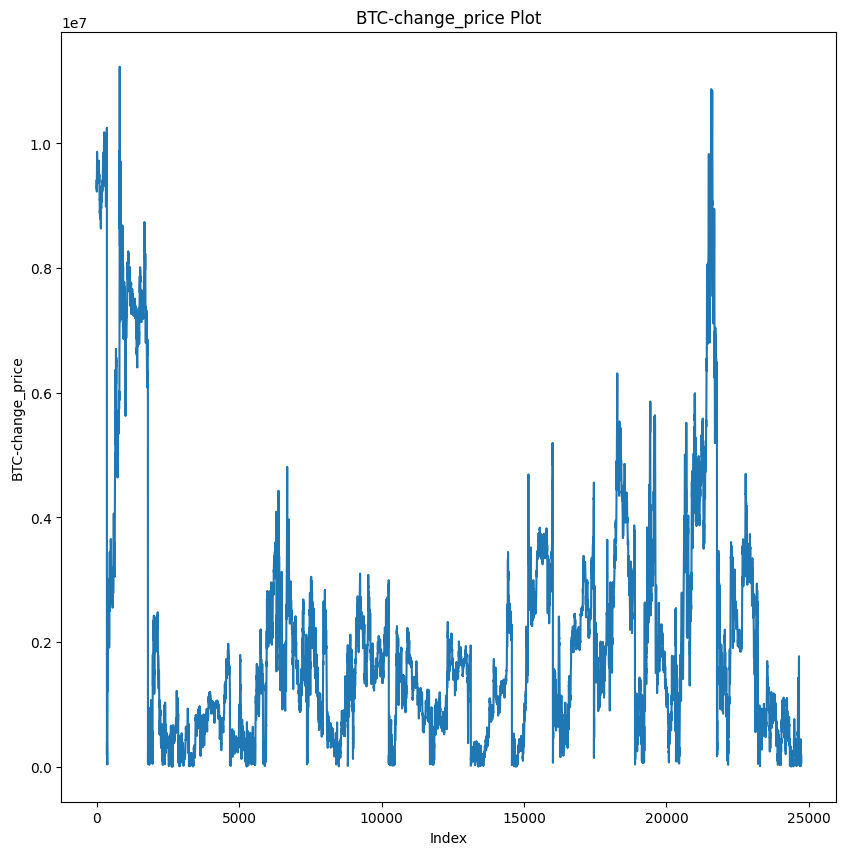

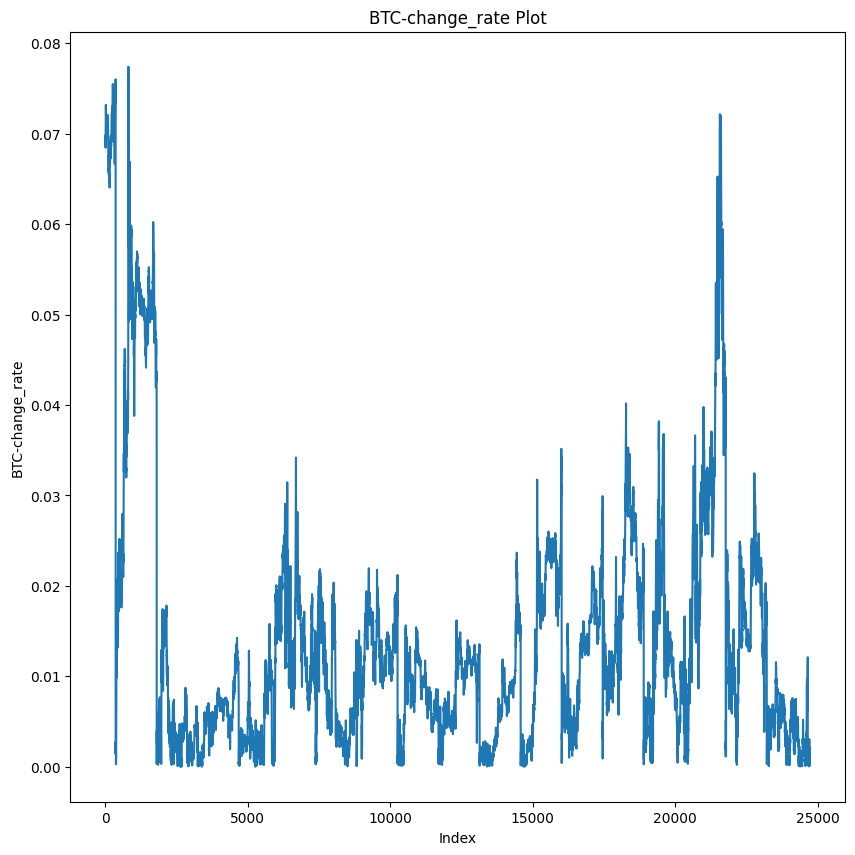

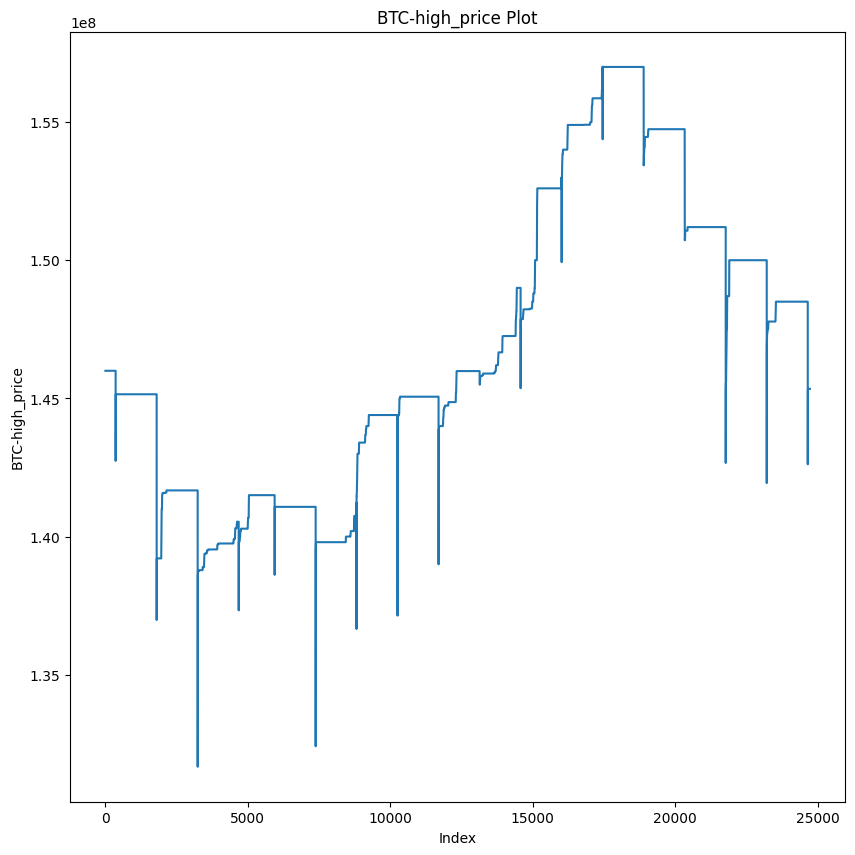

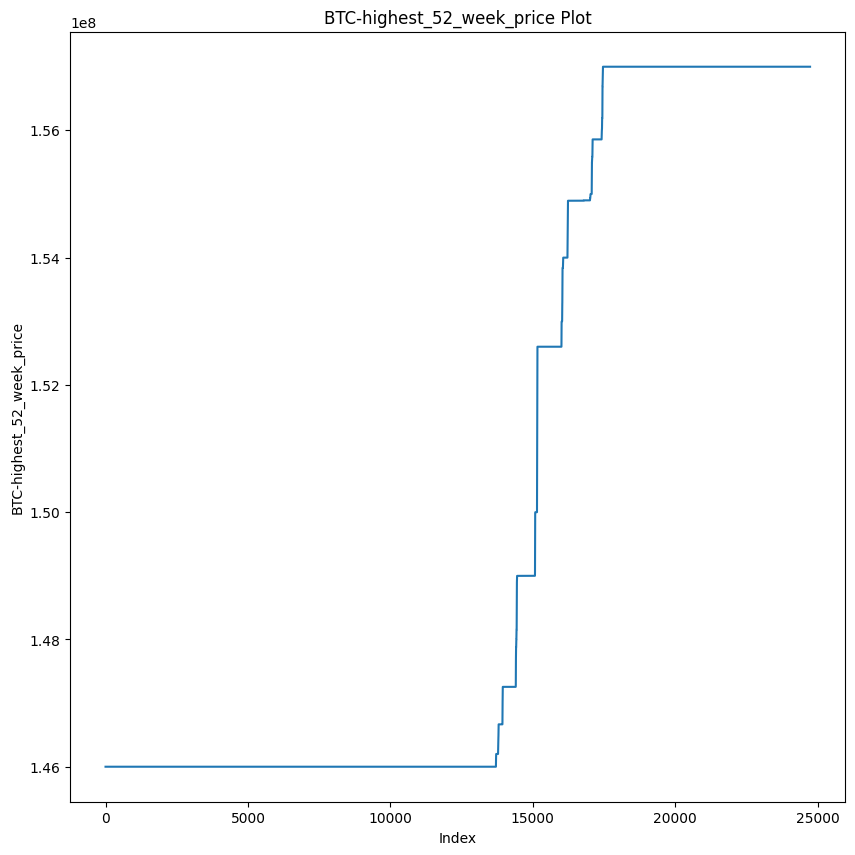

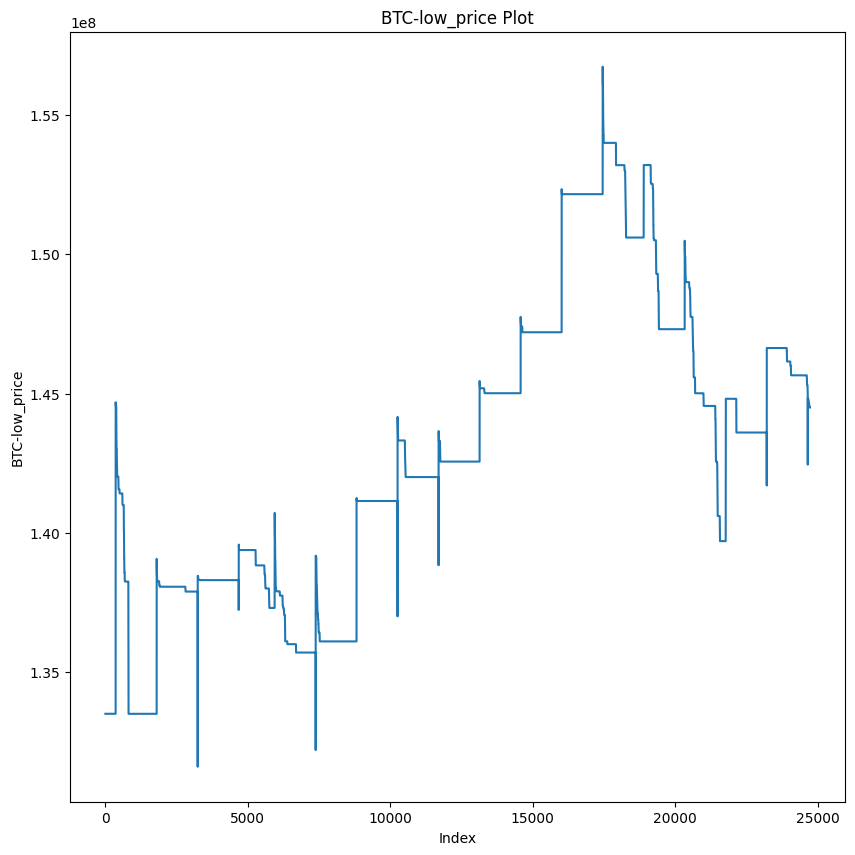

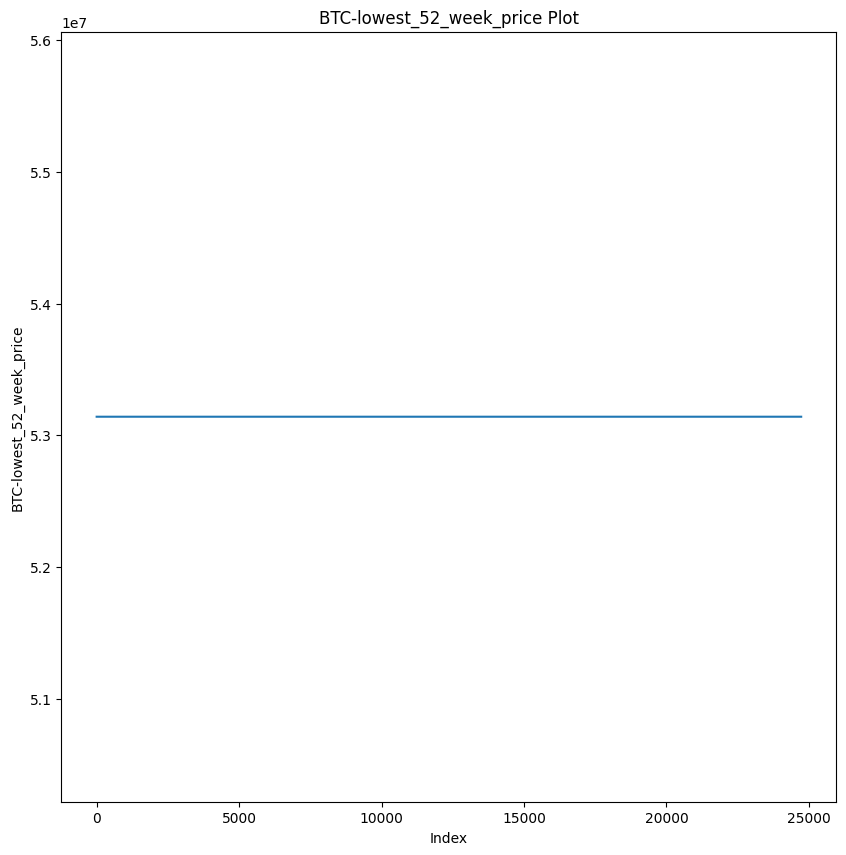

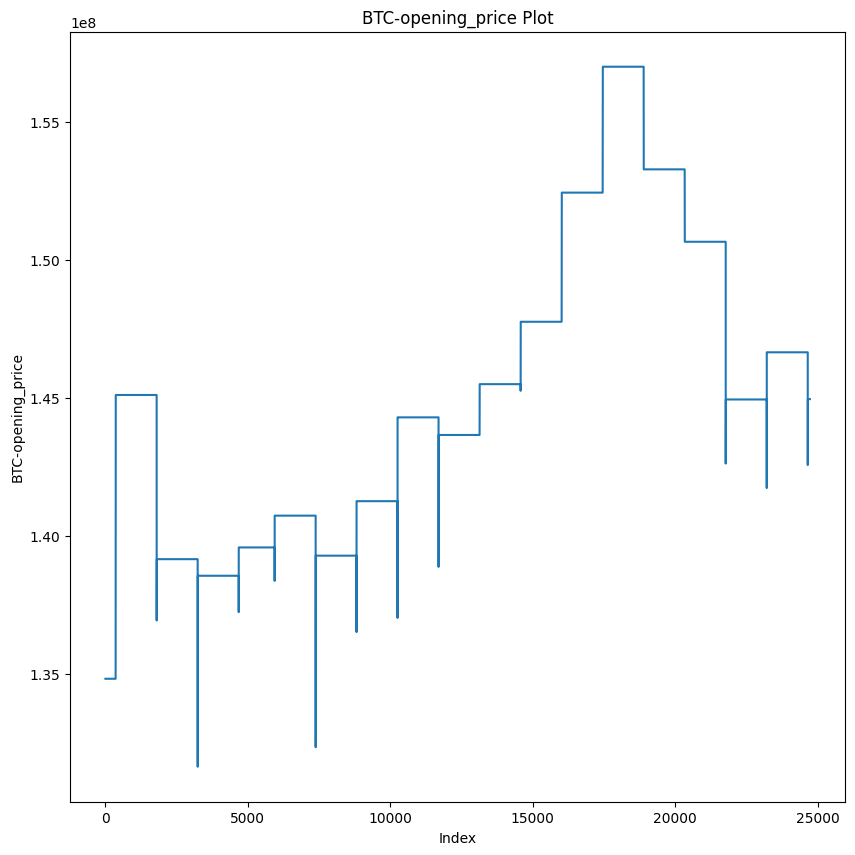

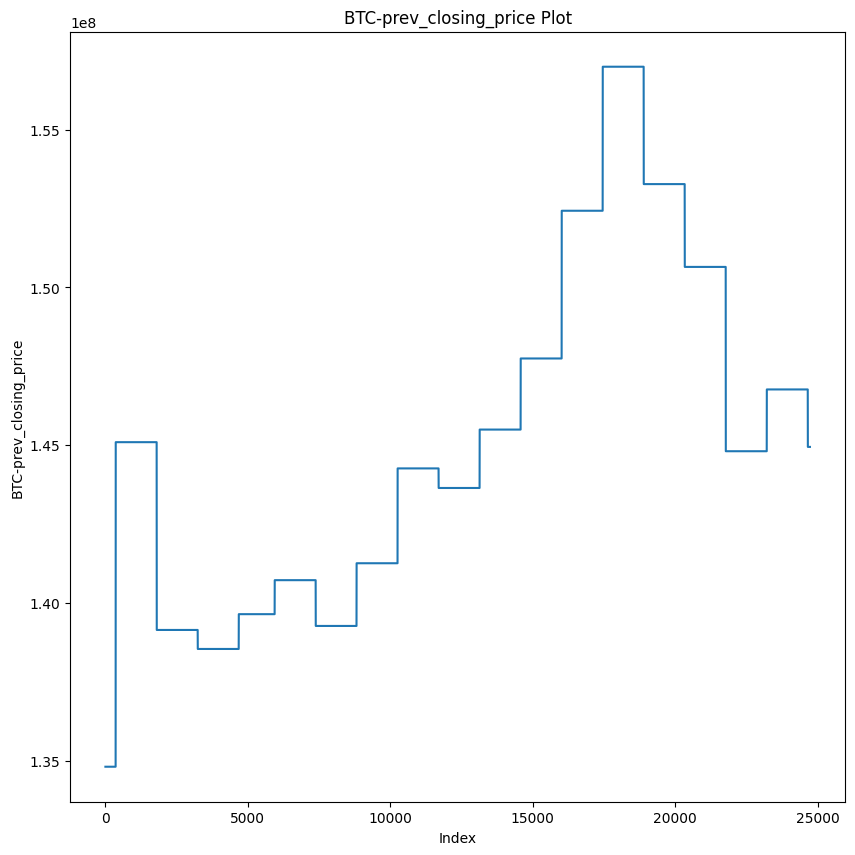

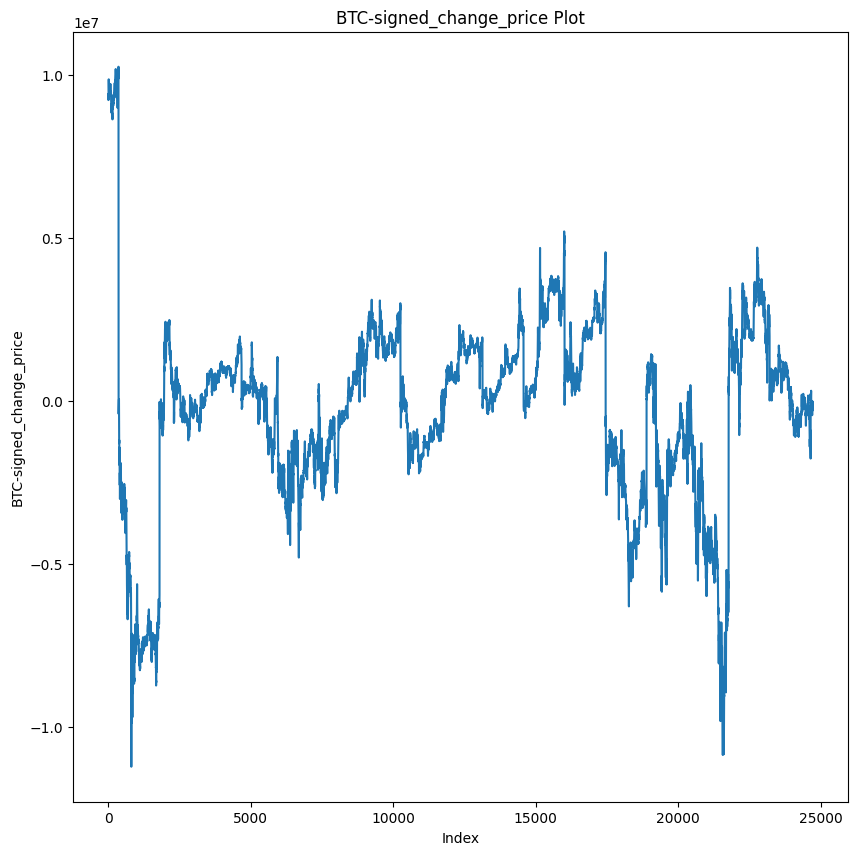

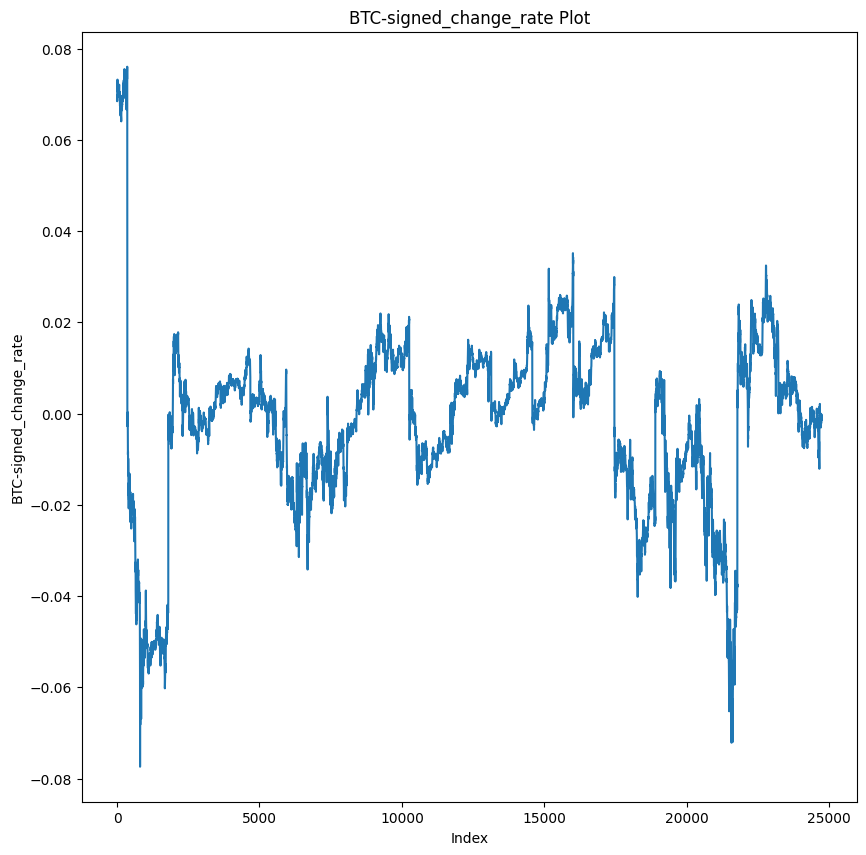

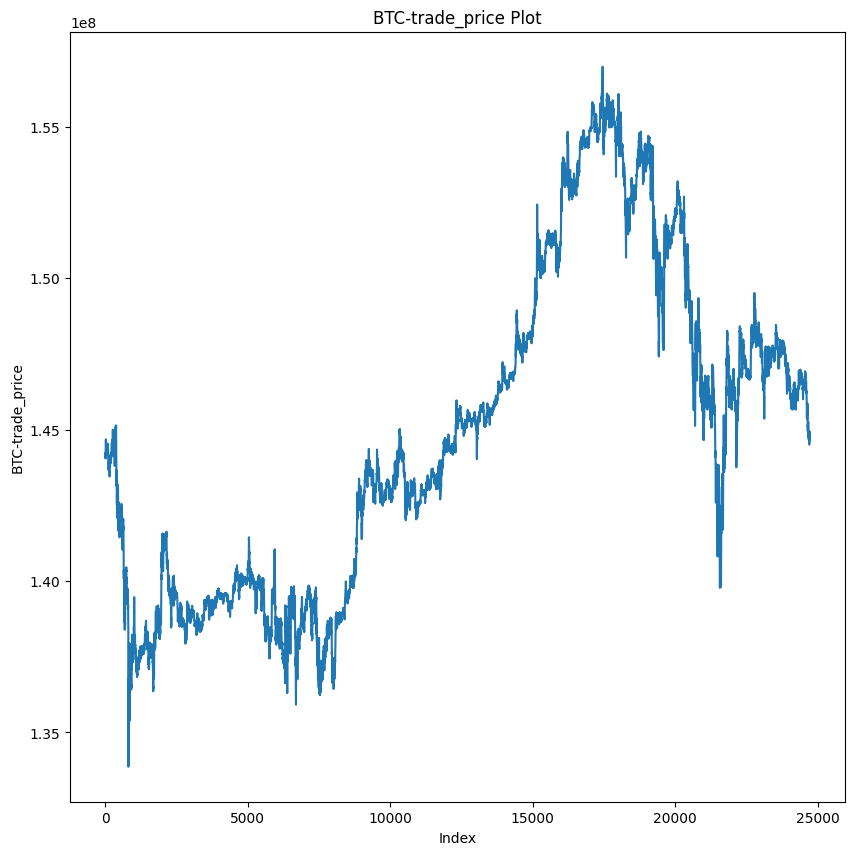

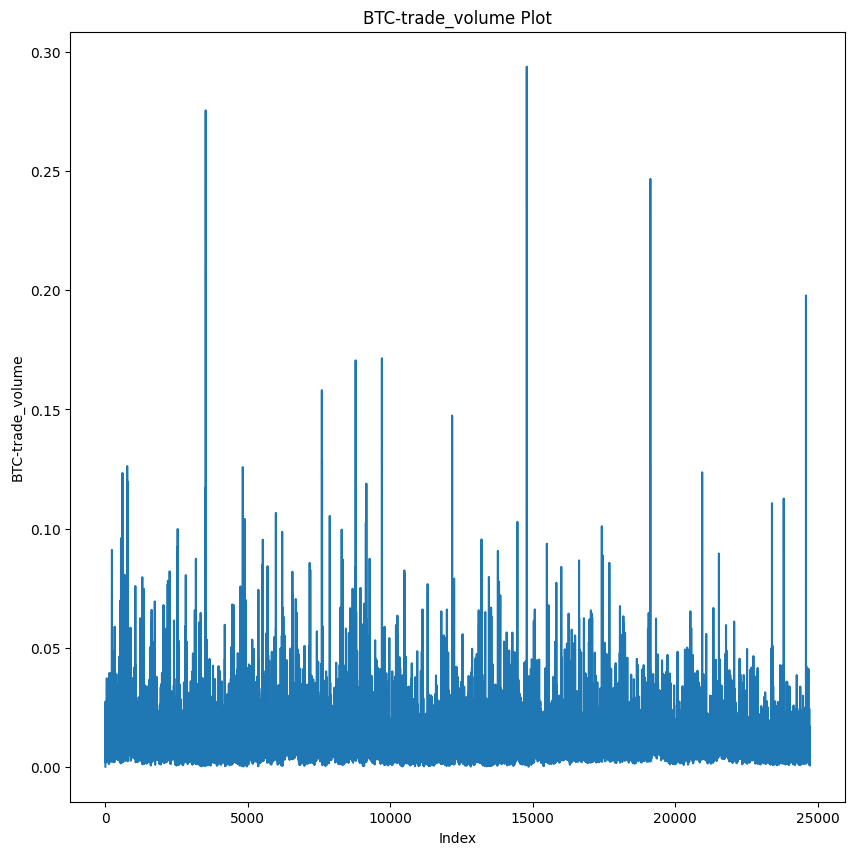

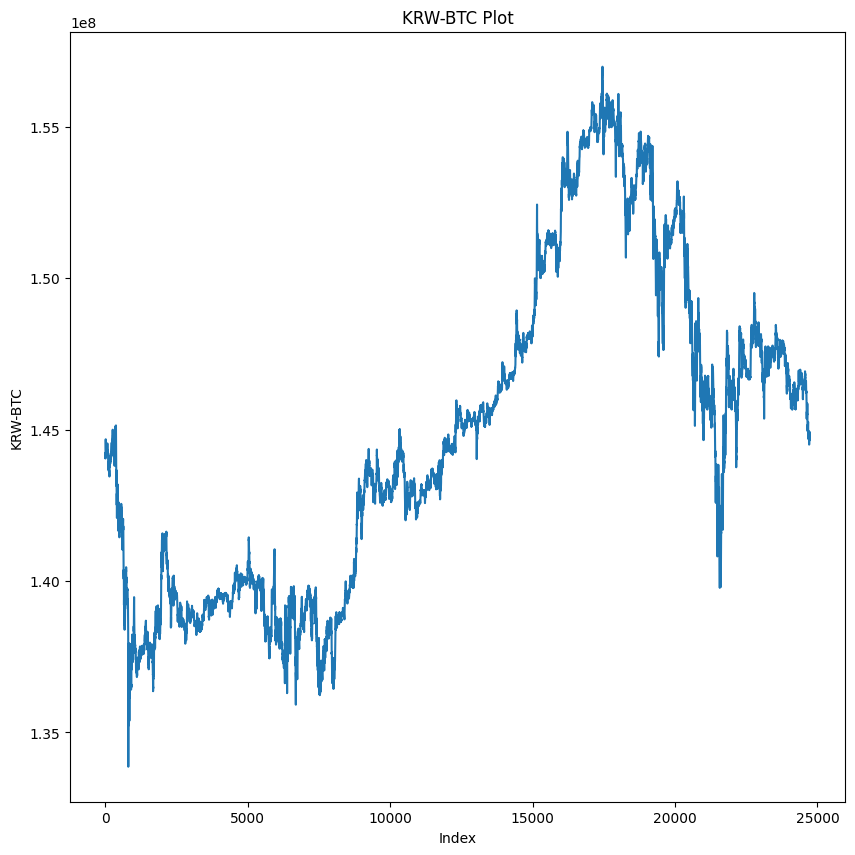

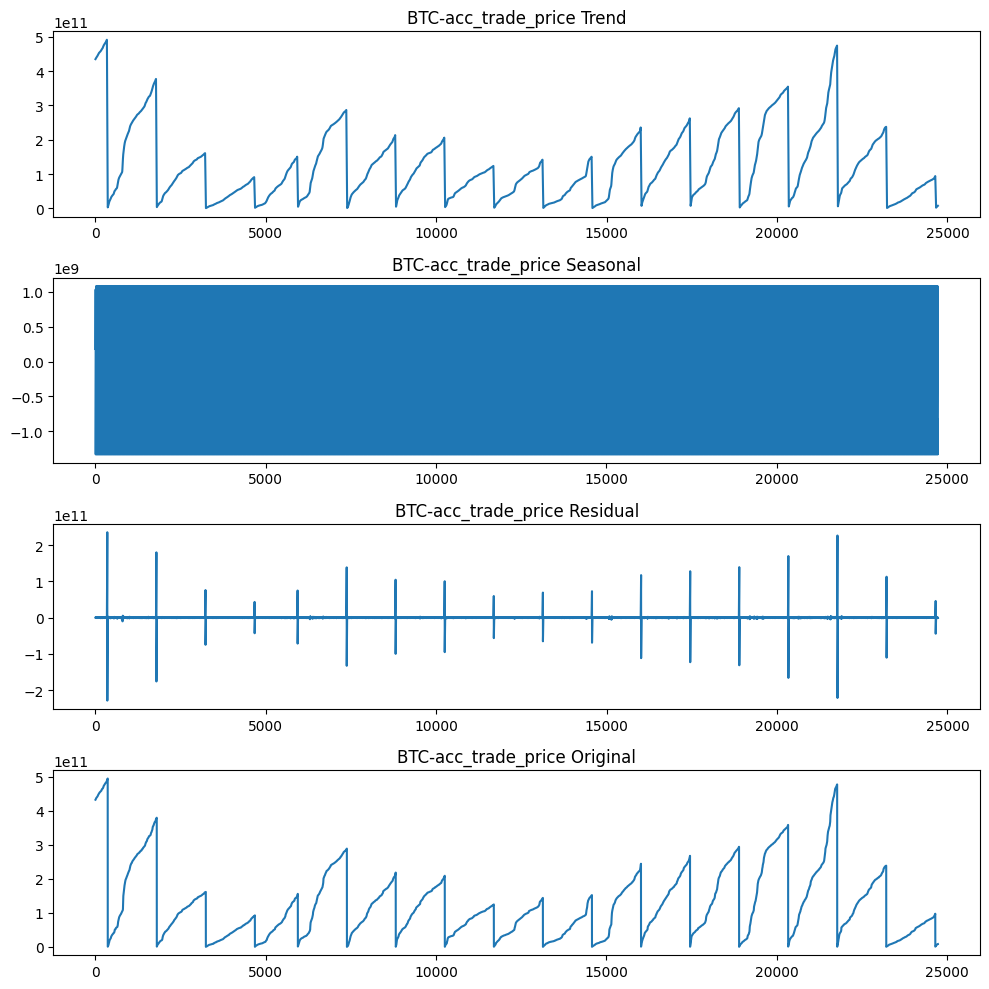

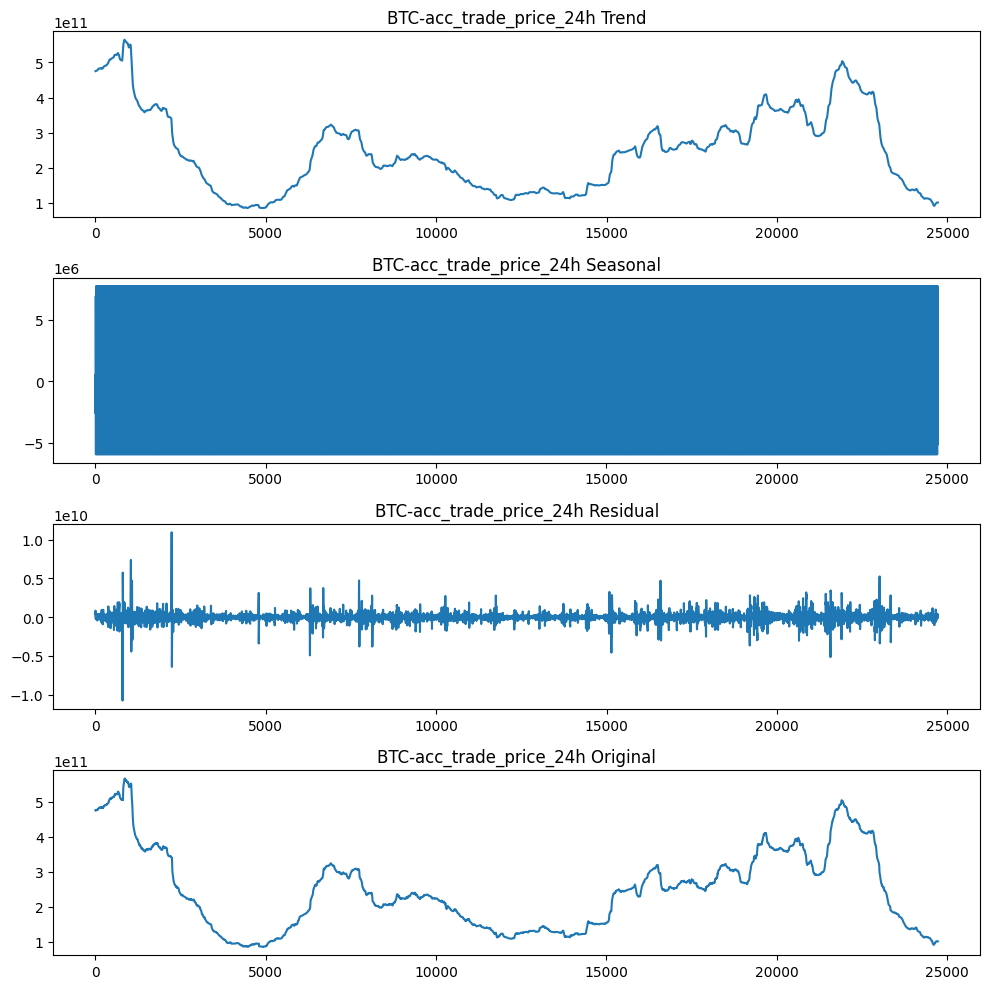

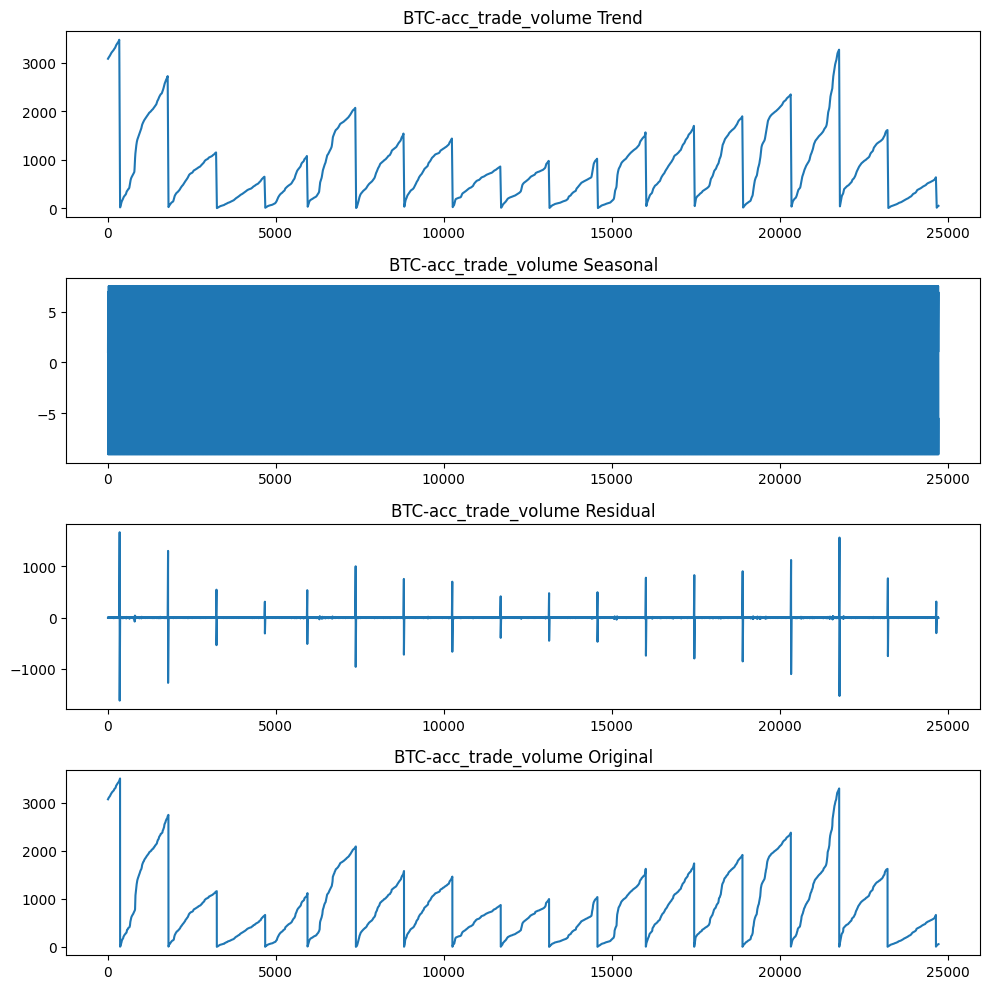

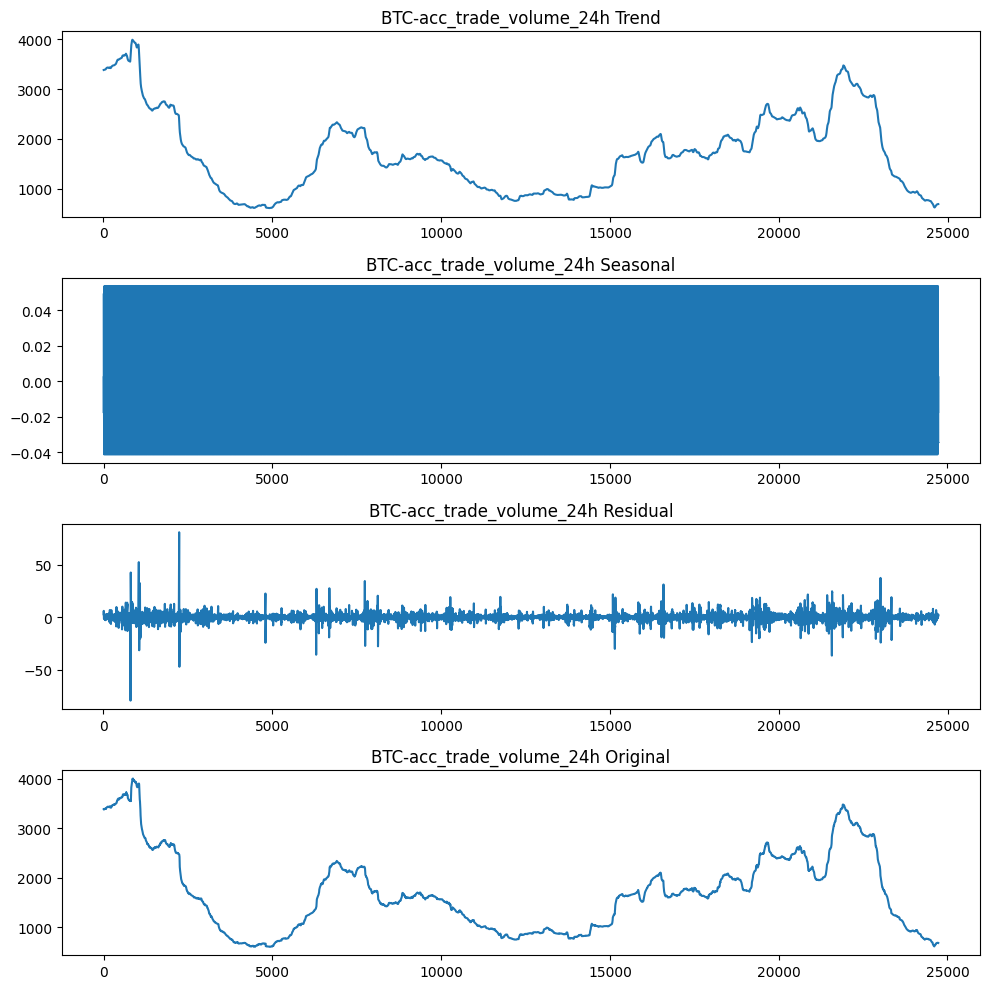

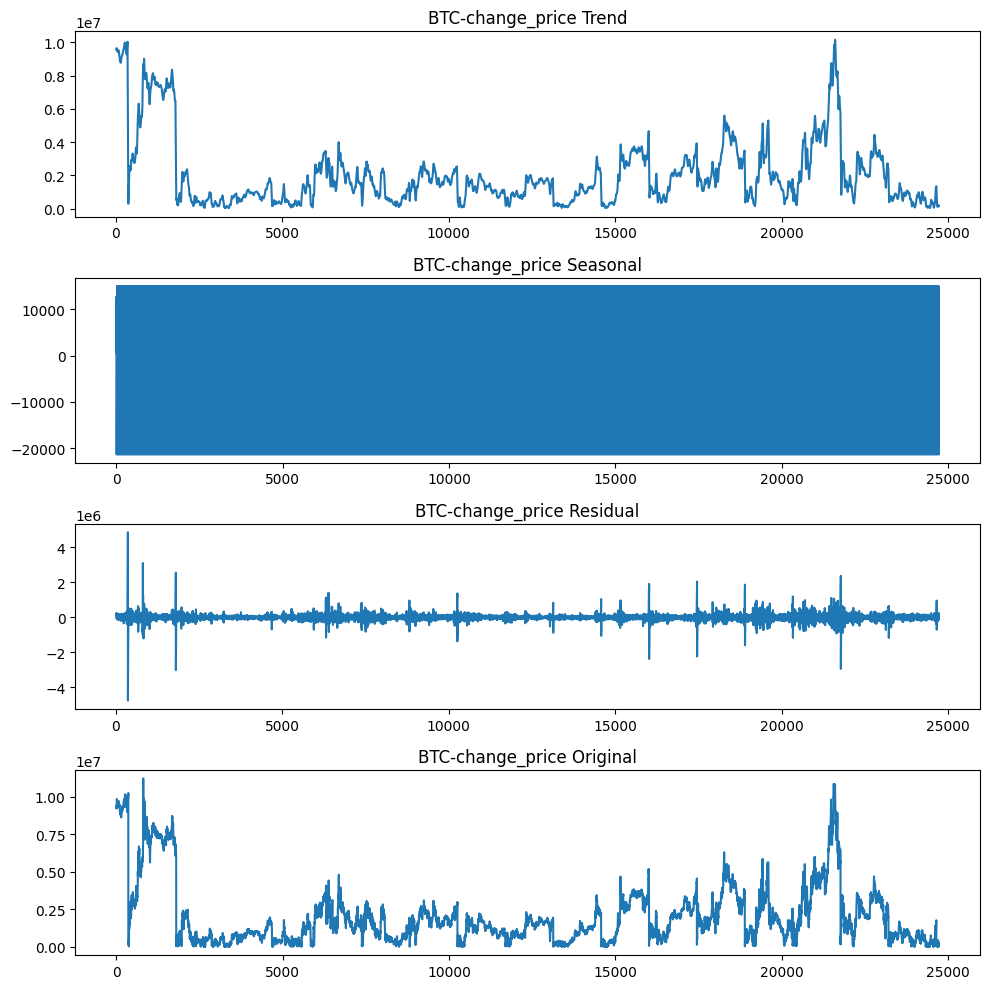

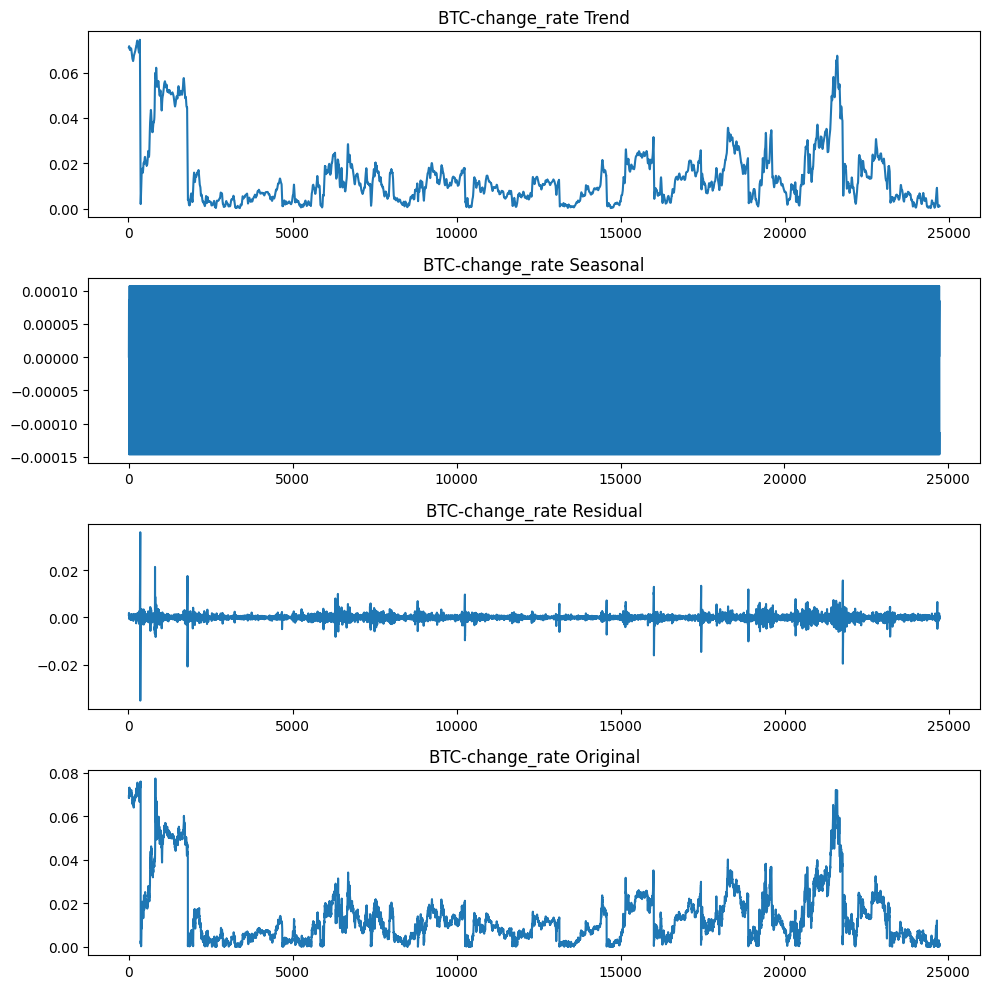

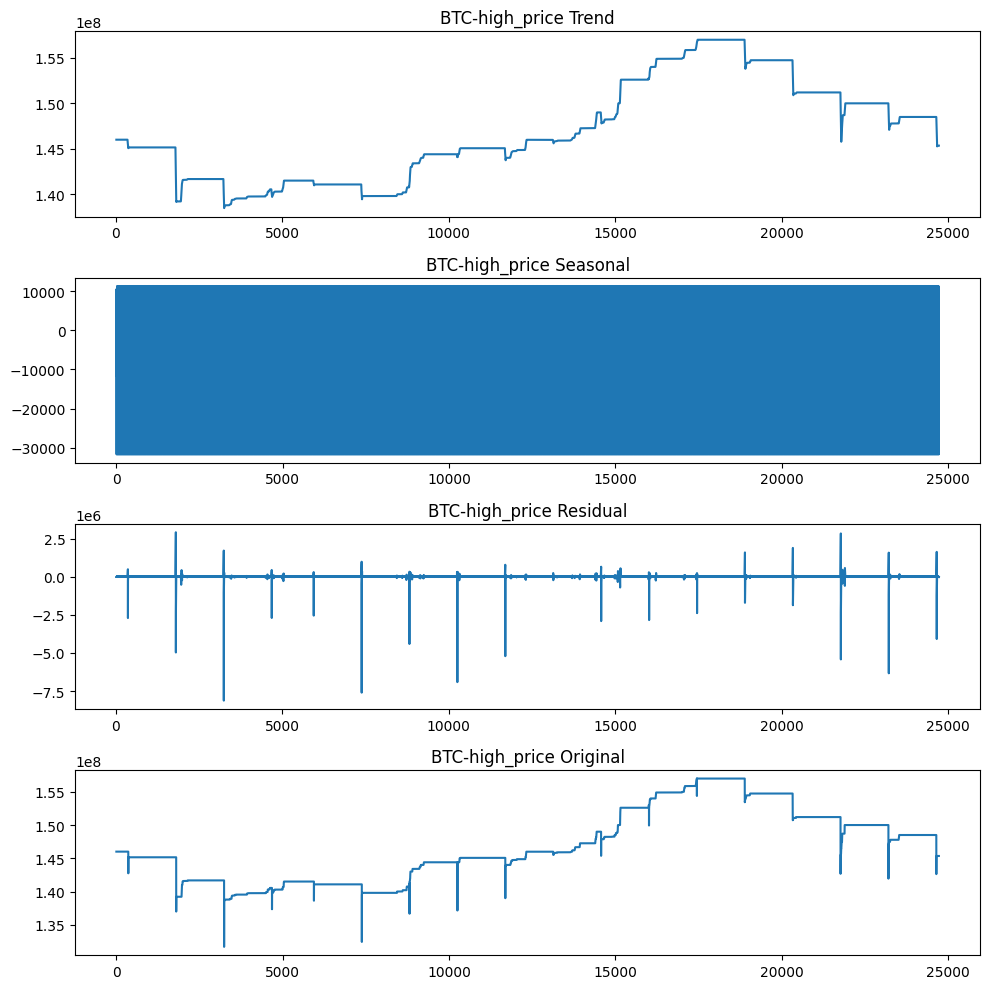

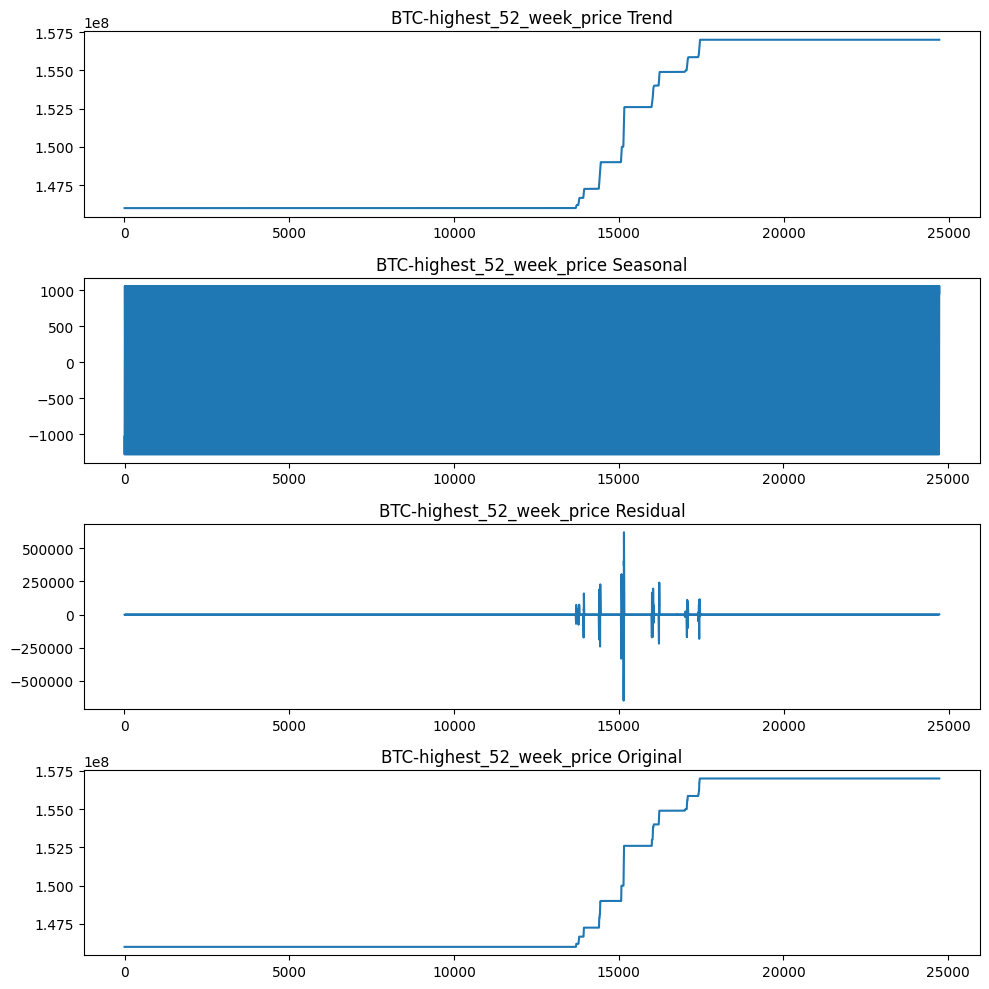

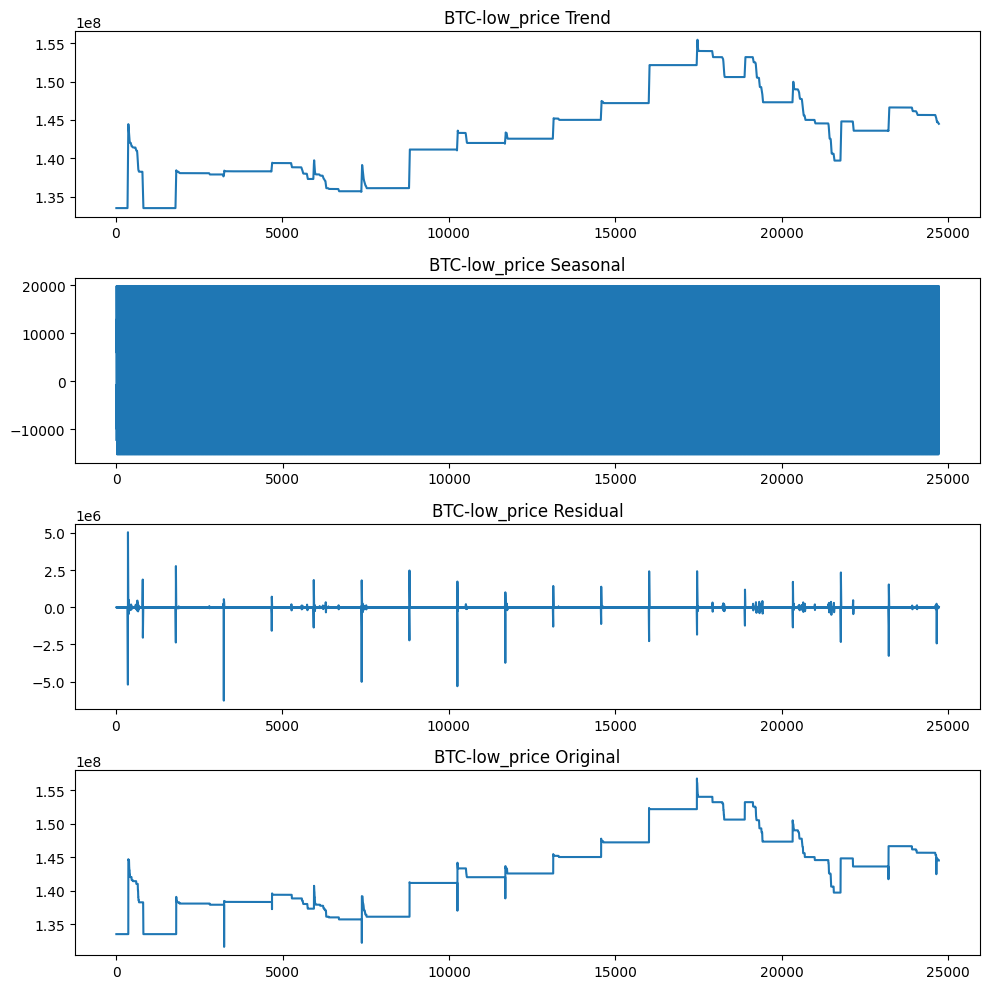

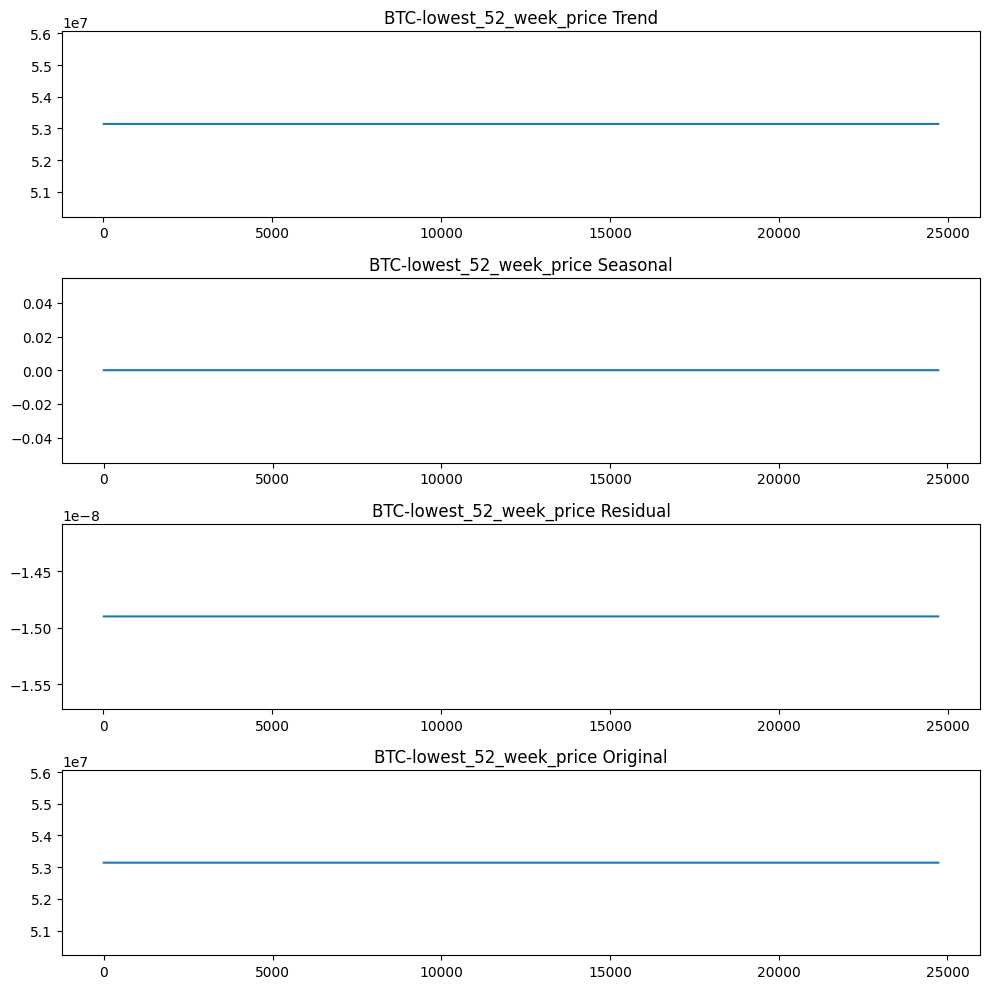

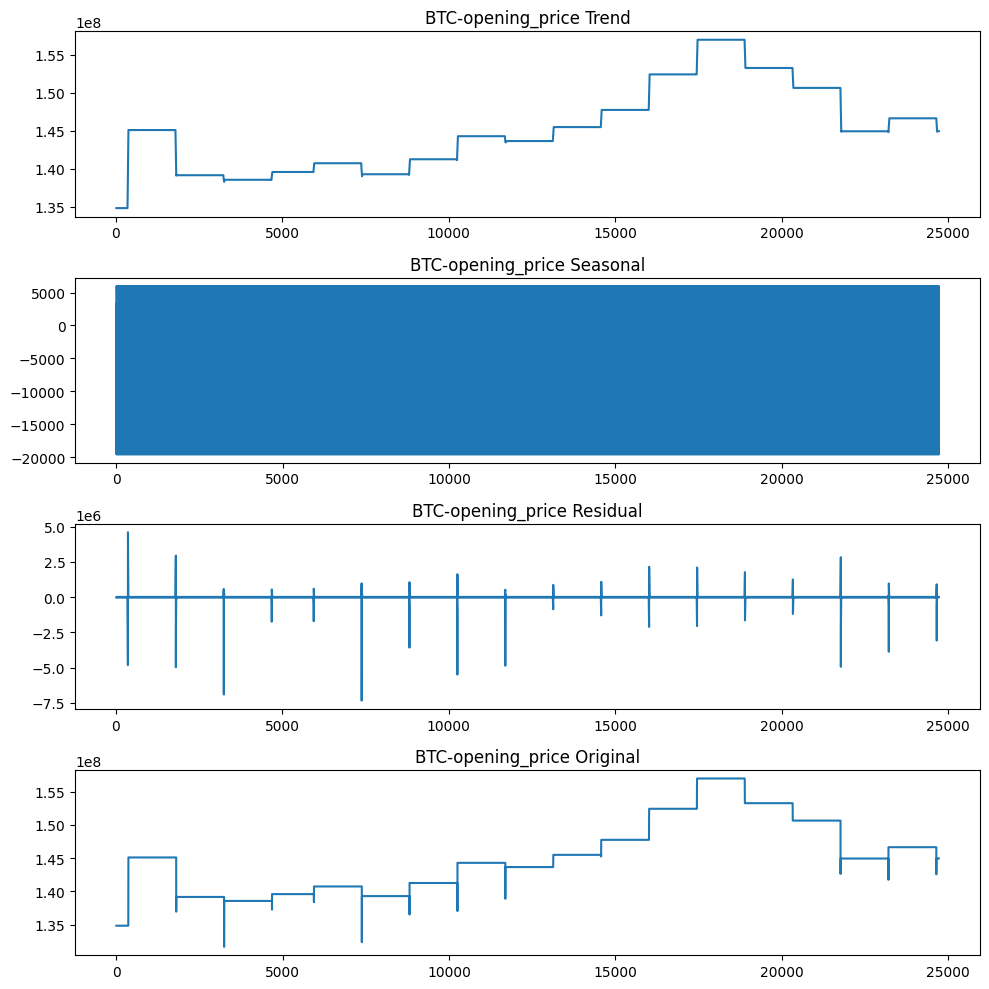

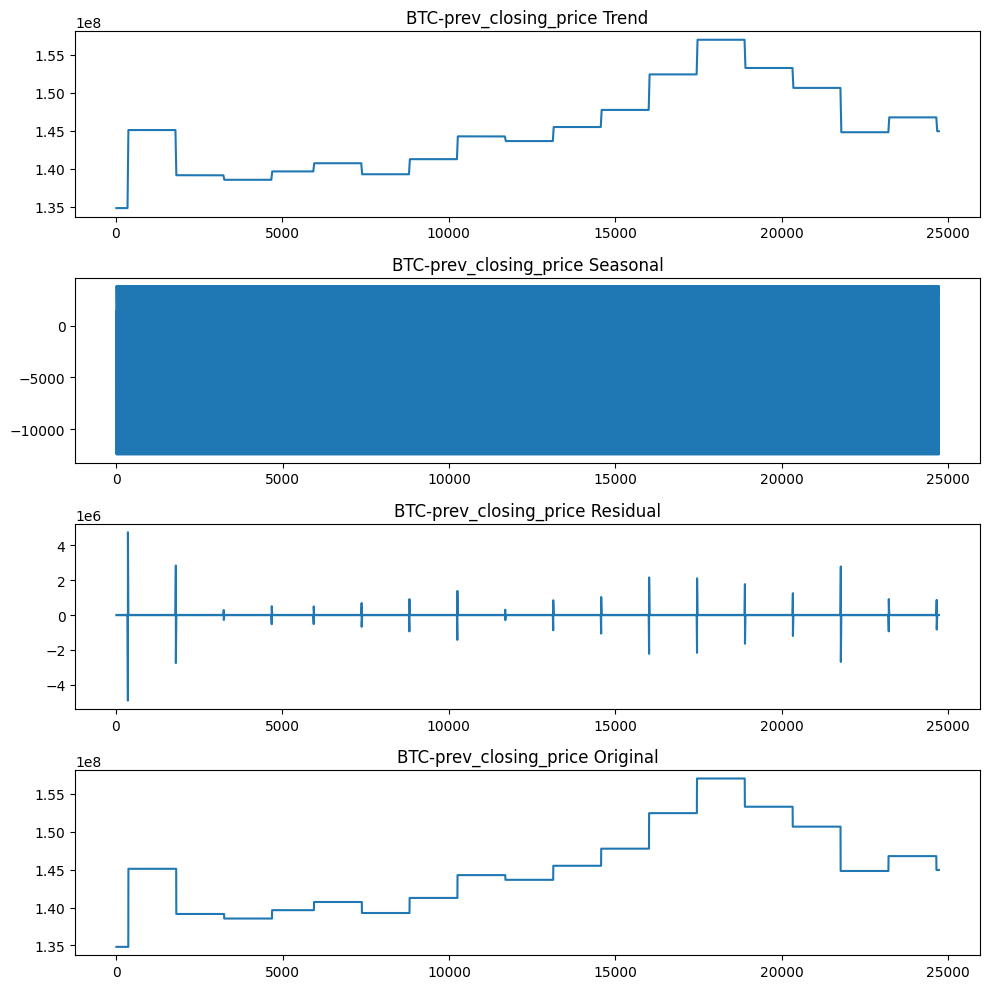

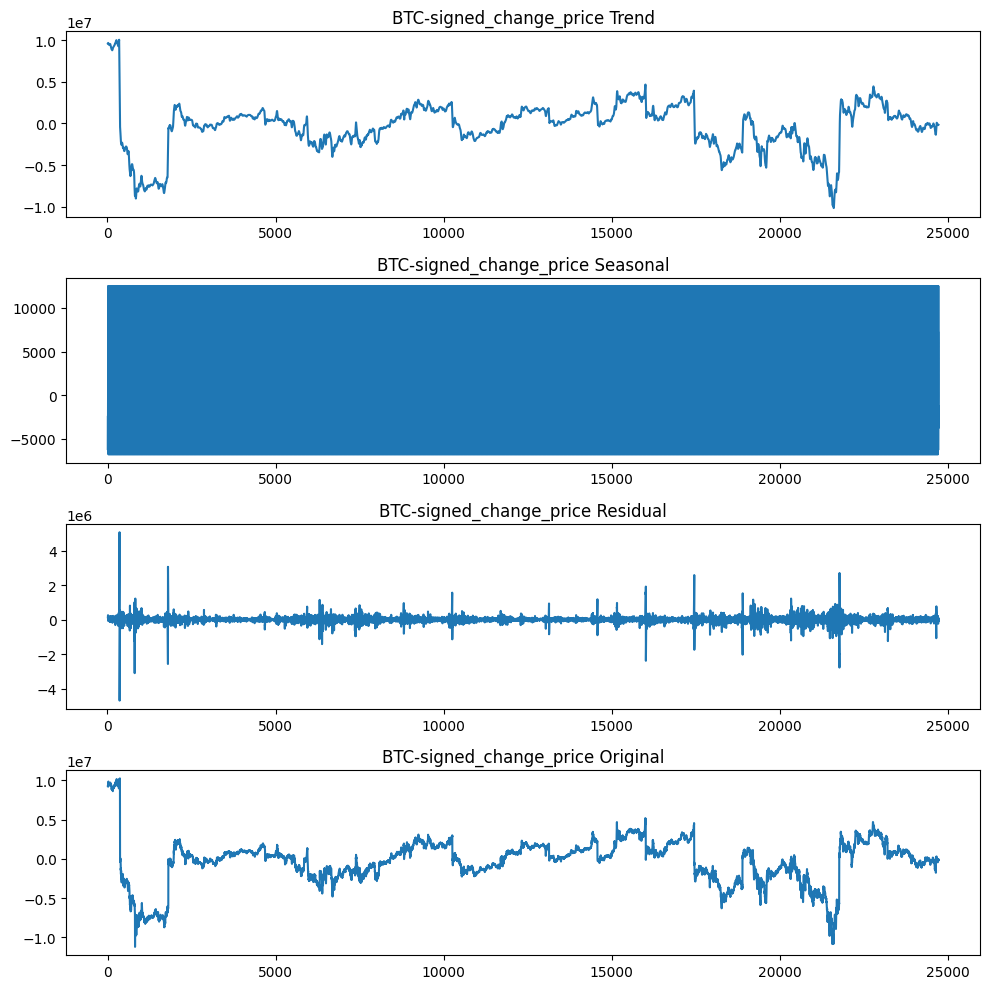

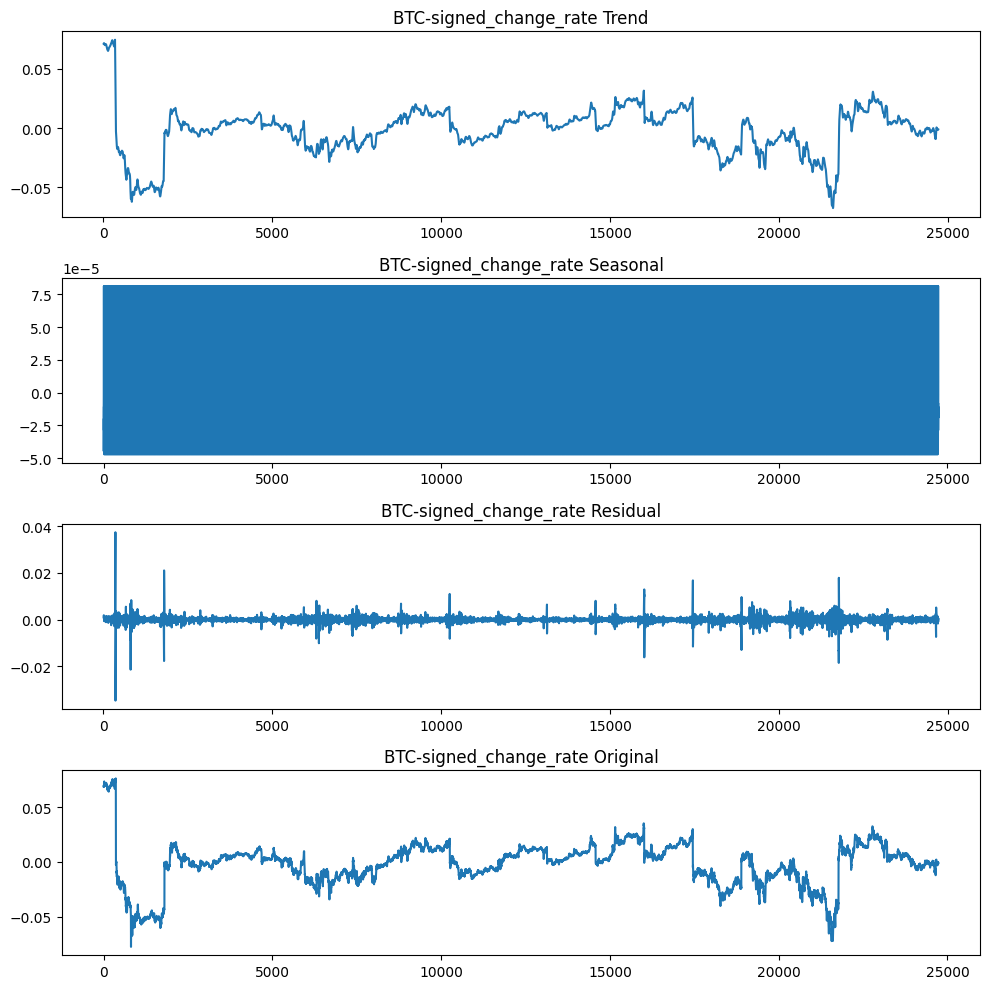

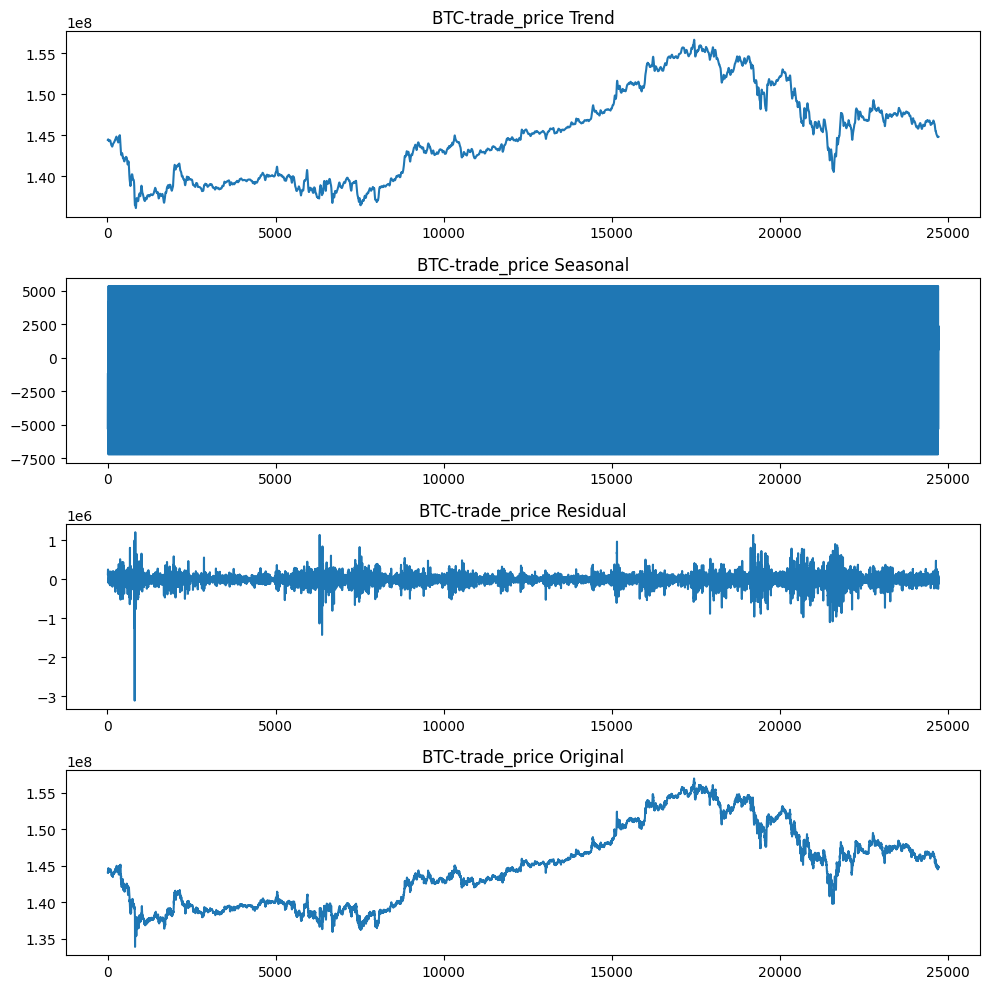

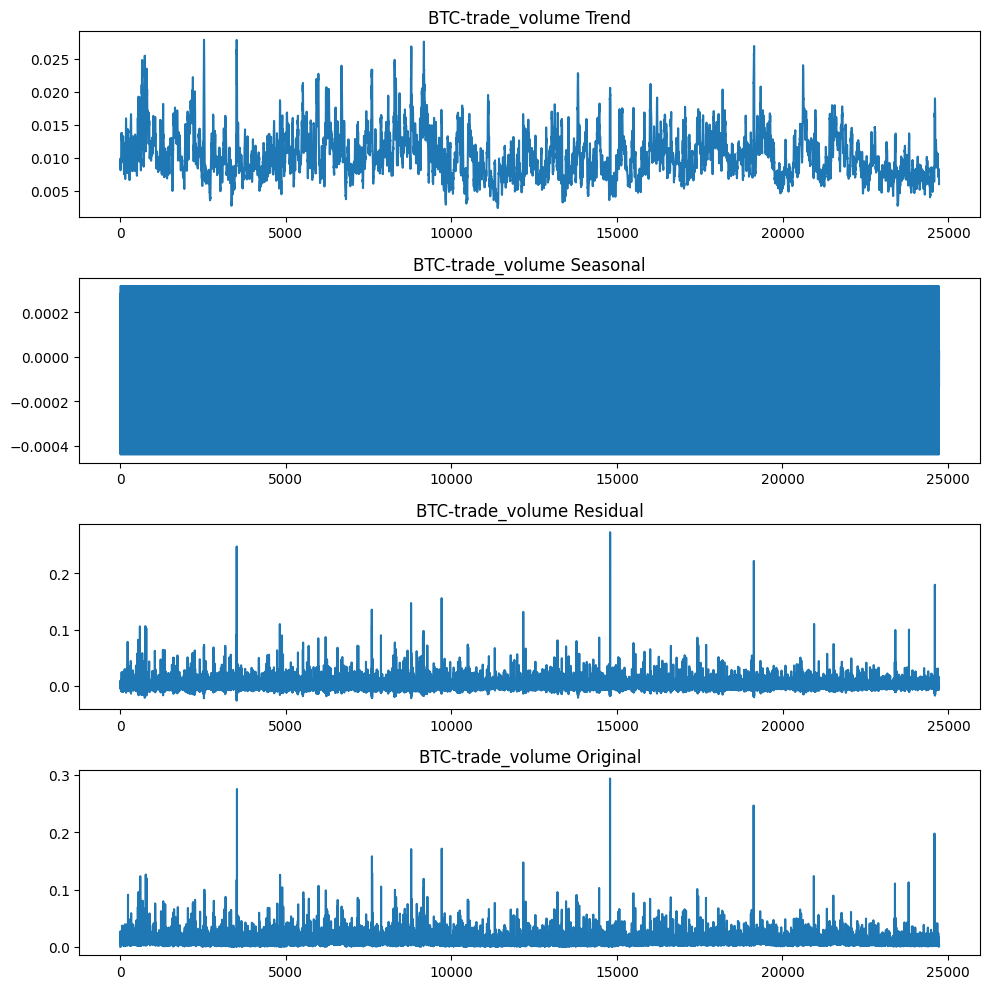

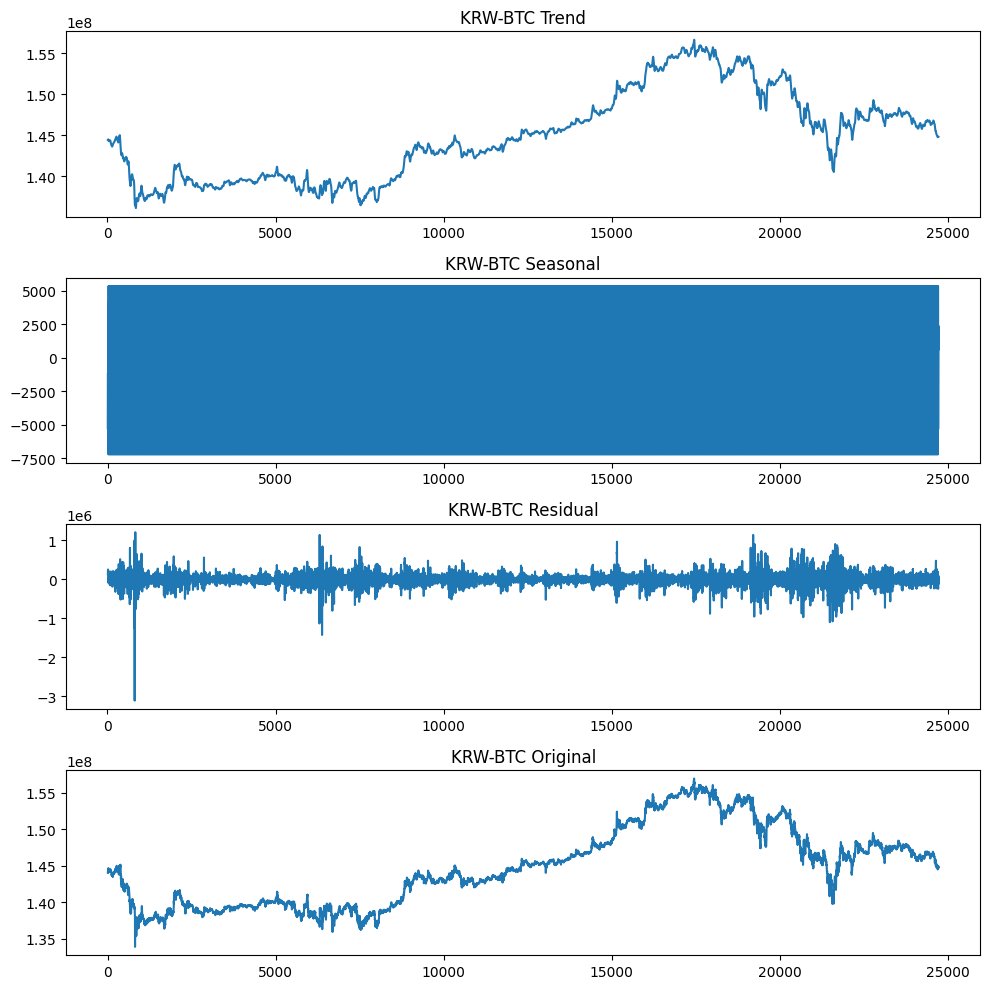

Save Finish


In [7]:
# Adjust period based on data for Decomposition
period = 24
# Plot width 
x_size = 10
# Plot height
y_size = 10
# Set option
# 1.HeatMap, 2.plot, 3.Decomposition, 4.All 
option = 4

# Set Start Function
Visualize_EDA(df, period, x_size, y_size, option)

## Check Statistical_Test

In [8]:
# Check ADF Test
adf_test(df)


adf_test for column: BTC-acc_trade_price
ADF Statistic: -6.091857145126798
p-value: 1.0319166473161781e-07
Critical Values: {'1%': -3.430614465968218, '5%': -2.8616568858943534, '10%': -2.566832214953752}
The series is stationary
------------------------------------------------------------------------------------------------------------------

adf_test for column: BTC-acc_trade_price_24h
ADF Statistic: -1.9468809878577127
p-value: 0.3103381279673152
Critical Values: {'1%': -3.4306148837586345, '5%': -2.8616570705367406, '10%': -2.5668323132349435}
The series is not stationary
------------------------------------------------------------------------------------------------------------------

adf_test for column: BTC-acc_trade_volume
ADF Statistic: -6.122949470646536
p-value: 8.765805123669227e-08
Critical Values: {'1%': -3.430614465968218, '5%': -2.8616568858943534, '10%': -2.566832214953752}
The series is stationary
----------------------------------------------------------------------

In [9]:
# Check KPSS Test
kpss_test(df)


kpss_test for column: BTC-acc_trade_price
KPSS Statistic: 0.79094201237903
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is not stationary
------------------------------------------------------------------------------------------------------------------

kpss_test for column: BTC-acc_trade_price_24h
KPSS Statistic: 2.527158527189704
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is not stationary
------------------------------------------------------------------------------------------------------------------

kpss_test for column: BTC-acc_trade_volume
KPSS Statistic: 0.696753707116452
p-value: 0.013840572080322543
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is not stationary
------------------------------------------------------------------------------------------------------------------

kpss_test for column: BTC-acc_trade_volume_24h
KPSS Sta

In [10]:
# Check PP Test
pp_test(df)


pp_test for column: BTC-acc_trade_price

Phillips-Perron Test for column: BTC-acc_trade_price
Test Statistic: -6.113180303753883
p-value: 9.227341092053407e-08
The series is stationary
------------------------------------------------------------------------------------------------------------------

pp_test for column: BTC-acc_trade_price_24h

Phillips-Perron Test for column: BTC-acc_trade_price_24h
Test Statistic: -1.6163554127460418
p-value: 0.474640525060343
The series is not stationary
------------------------------------------------------------------------------------------------------------------

pp_test for column: BTC-acc_trade_volume

Phillips-Perron Test for column: BTC-acc_trade_volume
Test Statistic: -6.148287946531801
p-value: 7.671747950207051e-08
The series is stationary
------------------------------------------------------------------------------------------------------------------

pp_test for column: BTC-acc_trade_volume_24h

Phillips-Perron Test for column: BTC-ac

In [11]:
# Check ljung box Test
ljung_box_test(df, lags=10)


Ljung-Box Test for column: BTC-acc_trade_price
p-value: 0.0
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: BTC-acc_trade_price_24h
p-value: 0.0
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: BTC-acc_trade_volume
p-value: 0.0
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: BTC-acc_trade_volume_24h
p-value: 0.0
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: BTC-change_price
p-value: 0.0
There is autocorrelation
-------------------------------------------------------------------------------------------------------

In [12]:
# Check Arch Test
arch_test(df)


arch_test for column: BTC-acc_trade_price
ARCH Model Results:

Omega (Intercept): 1.01e+21
Alpha[1] (ARCH Term): 0.8013

Model Evaluation:
Log-Likelihood: -650817.47
AIC (Akaike Information Criterion): 1301640.94
BIC (Bayesian Information Criterion): 1301665.29

Interpretation:
Omega value is high, indicating a higher level of volatility in the model.
Alpha[1] is high, suggesting that past variances have a strong effect on current volatility.
------------------------------------------------------------------------------------------------------------------

arch_test for column: BTC-acc_trade_price_24h
ARCH Model Results:

Omega (Intercept): 1.30e+21
Alpha[1] (ARCH Term): 0.8254

Model Evaluation:
Log-Likelihood: -654616.65
AIC (Akaike Information Criterion): 1309239.29
BIC (Bayesian Information Criterion): 1309263.64

Interpretation:
Omega value is high, indicating a higher level of volatility in the model.
Alpha[1] is high, suggesting that past variances have a strong effect on curre

c:\Users\MACH-DE-28\anaconda3\envs\test\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\MACH-DE-28\anaconda3\envs\test\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [13]:
# Check VIF Test
vif_test(df)

Variable: BTC-acc_trade_price, VIF: 1414.82, Interpretation: High multicollinearity
Variable: BTC-acc_trade_price_24h, VIF: 2227.77, Interpretation: High multicollinearity
Variable: BTC-acc_trade_volume, VIF: 1423.83, Interpretation: High multicollinearity
Variable: BTC-acc_trade_volume_24h, VIF: 2159.72, Interpretation: High multicollinearity
Variable: BTC-change_price, VIF: 1500.05, Interpretation: High multicollinearity
Variable: BTC-change_rate, VIF: 1516.87, Interpretation: High multicollinearity
Variable: BTC-high_price, VIF: 87.71, Interpretation: High multicollinearity
Variable: BTC-highest_52_week_price, VIF: 4.77, Interpretation: Low multicollinearity
Variable: BTC-low_price, VIF: 78.85, Interpretation: High multicollinearity
Variable: BTC-lowest_52_week_price, VIF: 0.00, Interpretation: Low multicollinearity
Variable: BTC-opening_price, VIF: 2539.46, Interpretation: High multicollinearity
Variable: BTC-prev_closing_price, VIF: 4605207.15, Interpretation: High multicollineari